# Regressão Linear

# Imports

In [2]:
# Import da biblioteca pandas
import pandas as pd

# Import da Biblioteca matplotlib
import matplotlib.pyplot as plt

# Import das Classes de preprocessamento
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import da função de validacao
from sklearn.model_selection import train_test_split

# Import das funções de avaliacao
from sklearn.metrics import root_mean_squared_error

# Import da Classe do modelo
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Import das Classe de Pipeline
from sklearn.pipeline import Pipeline

# Import da Classe de ColumnTransform
from sklearn.compose import ColumnTransformer

# Leitura dos dados

In [3]:
# Criação do Dataframe com os dados
data = pd.read_csv('../Data/Life Expectancy Data.csv')

# Remoção de espaços duplos dos nomes de colunas
data.columns = data.columns.str.strip()

# Exibição das primeiras linhas da coluna
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Analise do dataframe

Para desenvolver o modelo é necessário compreender os dados que serão utilizados, isso pode influenciar a forma como os dados serão pre-processados. Portanto essa sesão tem o objetivo de reunir alguns dados sobre o dataframe como:

- Tipos de dados
- Ausencia de valores

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Podemos observar que o dataframe possui valores do tipo float, int e object (normalmente indica textos)

In [5]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Aqui é possivel ver que algumas colunas possuem valores nulos, esses valores podem ser inferidos atraves da média e da mediana no pre-processamento. Porém, a coluna de target (Life expectancy) também possui vaores nulos, que nesse caso devem ser reovidos antes da separação das features e dos testes, pois podem causar erros na etapa de treino.

# Remoção dos targets nulos

In [6]:
data = data.dropna(subset=['Life expectancy'])

# Preenchimento de valores ausentes

Para tornar a imputação de dados mais precisa, nesse projeto a imputação dos valores numéricos não será realizada através do ColumnTransform, e sim será preenchida com a média de cada país de forma isolada. Dessa forma, após aplicar esse processo não é ecessário imputar valores nulos para colunas numéricas.

In [7]:
# Lista as colunas com dados numéricos (int e float)
num_cols_names = data.select_dtypes(include=(['int', 'float'])).columns

# Itera sobre o nome das colunas e preenche os valores ausentes de acordo com a média de cada país
for col in num_cols_names:
    data[col] = data.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

Mesmo após a aplicação dessa função podemos observar que algumas colunas ainda possuem valores nulos, isso pode ocorrer quando todos os dados de um país para aquela coluna estão ausentes. Nesse caso não é possivel calcular a média dos dados. Portanto os demais dados nulos seram removidos

In [8]:
data = data.dropna().reset_index(drop=True)

data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Separação de features e Targets

In [9]:
# Features
X = data.drop(columns=['Life expectancy'])

# Targets
y = data[['Life expectancy']]

# Criação de Pipelines e Column Transformers

Aqui serão criados os pipelines e ColumnTransforms para automação do pré-processamento de dados.

In [10]:
# Colunas numéricas
num_cols = X.select_dtypes(include=['int', 'float'])

# Colunas categóricas
cat_cols = X.select_dtypes(include=['object'])

## Pipelines de transformação

In [11]:
# Construção de pipeline para dados numéricos
num_pipeline = Pipeline([
    ('Scaler', StandardScaler())
])

# Contrução de Pipeline para dados Categóricos
cat_pipeline = Pipeline([
    ('Encoding', OneHotEncoder())
])

## ColumnTransform

In [12]:
# Construção de ColumnTransform para dados numéricos
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_cols.columns),
    ('cat', cat_pipeline, cat_cols.columns)
])

## Pipeline

Com o Objetivo de analisar o desempenho de diferentes modelos, aqui serão criados varios pipelines, cada um representndo um modelo especifico

In [13]:
# Pipeline de Regressão Linear
lr_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model', LinearRegression())
])

# Pipeline de Lasso
lasso_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model', Lasso())
])

# Pipeline de Ridge
ridge_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model', Ridge())
])

# Pipeline de ElasticNet
elasticnet_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model', ElasticNet())
])

# Treino do modelo

In [14]:
# Separação dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Treino do modelo de Regressão Linear
lr_model = lr_pipeline.fit(X_train, y_train)

# Treino do modelo de Lasso
lasso_model = lasso_pipeline.fit(X_train, y_train)

# Trerino do modelo de Ridge
ridge_model = ridge_pipeline.fit(X_train, y_train)

# Treino do modelo de Elastic Net
elasticnet_model = elasticnet_pipeline.fit(X_train, y_train)

# Previsões

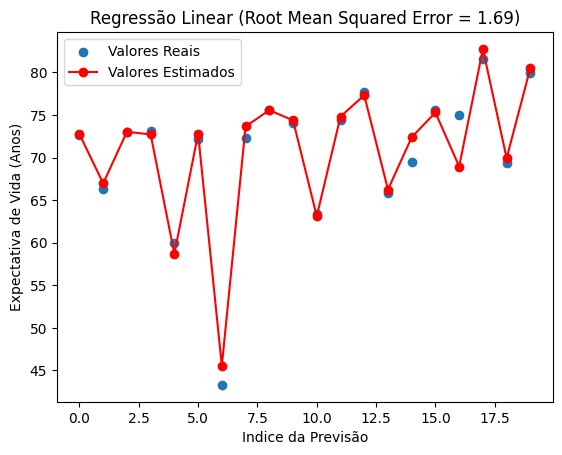

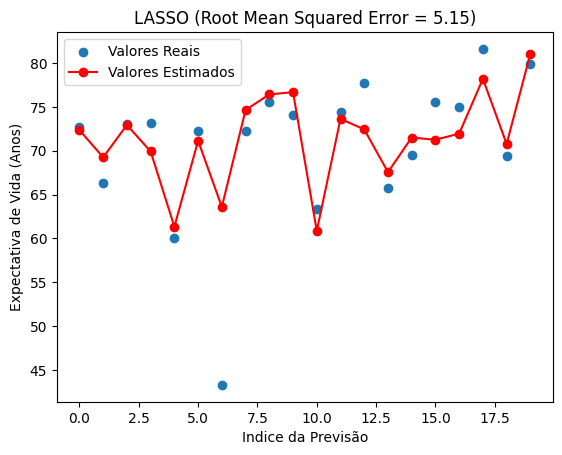

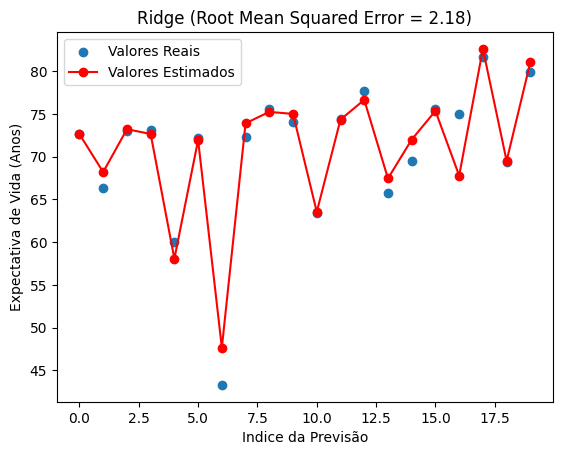

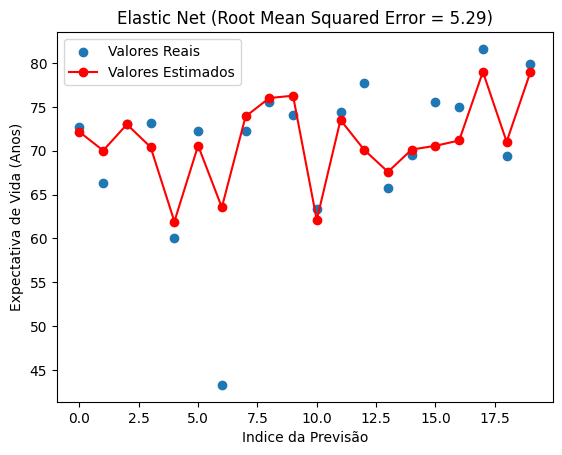

In [ ]:
# Cria um objeto para armazenar as previsões de cada modelo
models = {
    'Regressão Linear': lr_model.predict(X_test),
    'LASSO': lasso_model.predict(X_test),
    'Ridge': ridge_model.predict(X_test),
    'Elastic Net': elasticnet_model.predict(X_test)
}

# Cria um laço para exibir os gráficos de cada Modelo
for model in models.items():
    pred_data = (range(20), y_test[0:20], model[1][0:20])
    plt.scatter(pred_data[0], pred_data[1], label = 'Valores Reais')
    plt.plot(pred_data[0], pred_data[2], label = 'Valores Estimados', color = 'red', marker = 'o')
                                                        # Calcula  Erro Quadrático Médio e exibe no titulo do gráfico
    plt.title(f'{model[0]} (Root Mean Squared Error = {root_mean_squared_error(pred_data[1], pred_data[2]):.3})')
    plt.xlabel('Indice da Previsão')
    plt.ylabel('Expectativa de Vida (Anos)')
    plt.legend()
    plt.savefig(f'../Images/{model[0]}_pred')
    plt.show()